Codes used to type and visualise the answers can be found [here](https://github.com/Satriawidy/ortvay_2026)

**Question**

In a cylindrical fixed trough with radius $R$, a point mass $m$ is held on a rope as shown in the figure, with the rope passing over the trough and the other end attached to a mass $M$ hanging vertically. The acceleration due to gravity is $g$. Initially, the mass m is at rest at an angle $\phi_0$ ($−\pi/2 \leq \phi_0 \leq \pi/2$). Study the motion of the two bodies as a function of the given parameters.

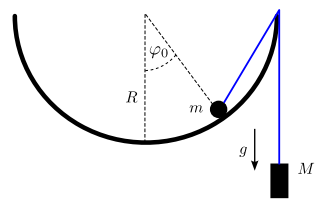

In [1]:
from IPython.display import Image
Image(filename='figures/image_6.png') 

**Answer**

There are various ways to obtain the equation of motion for this system. In our case, we will be using force analysis in the relevant directions.

The dynamics of $m$ and $M$ is related by the rope. Let us define $y$ as the distance of $M$ from the nearest end of the cylinder, and $L$ as the length of the rope. $L, y, \phi$ and $R$ must be related by

\begin{equation*}
L = y + 2R\sin\left(\frac{\pi}{4} - \phi/2\right)
\end{equation*}

Taking the time derivative twice, we obtain
\begin{align*}
0 &= \dot{y} - R\dot{\phi}\cos\left(\frac{\pi}{4} - \phi/2\right)\\
0 &= \ddot{y} - R\ddot{\phi}\cos\left(\frac{\pi}{4} - \phi/2\right) - \frac{1}{2}R\dot{\phi}^2\sin\left(\frac{\pi}{4} - \phi/2\right)
\end{align*}

**M dynamic**

The dynamic of $M$ only involves the gravitational force and the rope tension $T$ (assuming the rope is stretched ($T > 0$)), giving the following relation

\begin{equation*}
M\ddot{y} = Mg - T
\end{equation*}

Notice that based on our assumption, this equation is only valid for $g > \ddot{y}$.

**m dynamic**

The dynamic of $m$ involves gravitational force, rope tension, normal force, and (if applicable) the friction between its surface and the cylinder. A natural coordinate would be one that tangential and perpendicular to the cylinder surface. In this frame, assuming $m$ touches the cylinder ($N > 0$), the equation of motion is
\begin{align*}
mR\ddot{\phi} &= T\cos\left(\frac{\pi}{4} - \phi/2\right) - mg\sin(\phi) - f\\
0 &= N + T\sin\left(\frac{\pi}{4} - \phi/2\right) - mg\cos(\phi)
\end{align*}

where we treat $f$ as a force in the $-\phi$ direction. In truth, $f$ (if exists at all) can be in either two directions, depending on the mass relation between $m$ and $M$.

**Tangential motion**

First thing we can do is to obtain the dynamics of $\phi$ exclusively. This can easily be done by solving the $M$ dynamic for $T$ and substituting it into the $\phi$ dynamics, resulting in

\begin{align*}
mR\ddot{\phi} &= M(g - \ddot{y})\cos\left(\frac{\pi}{4} - \phi/2\right) - mg\sin(\phi) - f\\
mR\ddot{\phi} &= Mg\cos\left(\frac{\pi}{4} - \phi/2\right) - MR\ddot{\phi}\cos^2\left(\frac{\pi}{4} - \phi/2\right) - \frac{1}{4}MR\dot{\phi}^2\cos(\phi) - mg\sin(\phi) - f
\end{align*}
Thus
\begin{align*}
\left(m + M\cos^2\left(\frac{\pi}{4} - \phi/2\right)\right)R\ddot{\phi} &= g\left(M\cos\left(\frac{\pi}{4} - \phi/2\right) - m\sin(\phi)\right) - \frac{1}{4}MR\dot{\phi}^2\cos(\phi) - f\\
\ddot{\phi} &= \frac{g}{R}\frac{M\cos\left(\frac{\pi}{4} - \phi/2\right) - m\sin(\phi)}{M\cos^2\left(\frac{\pi}{4} - \phi/2\right) + m} - \frac{1}{R}\frac{\frac{1}{4}MR\dot{\phi}^2\cos(\phi) + f}{M\cos^2\left(\frac{\pi}{4} - \phi/2\right) + m}
\end{align*}

We can see here that at $\phi_0$, where $\dot{\phi}_0 = 0$, the direction of motion of the system depends entirely on $\phi_0$ and the mass relation between $M$ and $m$. To let us see more clearly, here we show a plot of $R\ddot{\phi}/g$ for different $m/M$ as a function of $\phi$, assuming no friction.

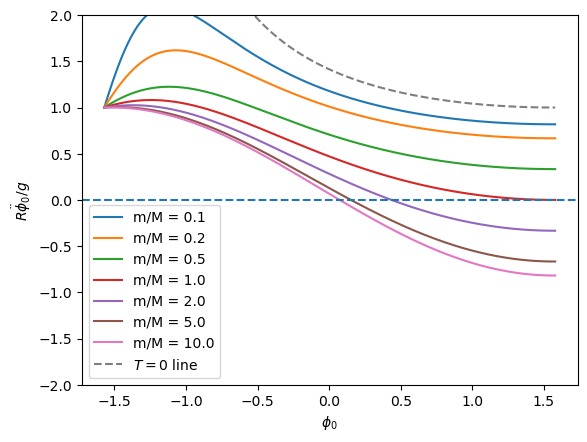

In [2]:
import numpy as np
import matplotlib.pyplot as plt

phi = np.arange(-np.pi/2, np.pi/2 + 0.01, 0.01)
mpM = np.array([0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0])

for mM in mpM:
    num = (np.cos(np.pi/4 - phi/2) - mM * np.sin(phi))
    den = (np.cos(np.pi/4 - phi/2)**2 + mM)
    acc = num / den
    plt.plot(phi, acc, label = f'm/M = {mM}')
plt.plot(phi, 1 / np.cos(np.pi/4 - phi/2), label = r'$T = 0$ line', linestyle = 'dashed')
plt.legend()
plt.axhline(0, linestyle = 'dashed')
plt.xlabel(r'$\phi_0$')
plt.ylabel(r'$R\ddot{\phi}_0/g$')
plt.ylim(-2, 2)
plt.show()

We can see that $m$ can only move in the negative $\phi$ direction if $m > M$, and this (reasonably) only happen for $\phi_0 > 0$. For $\phi_0 < 0$, the system will always move in the positive $\phi$ direction. Notice also that in every cases, we always have $T > 0$, ensuring the validity of our assumptions. 

**Can m be launched**

In some parameter region, we could end up in the scenario where $m$ will be ejected from the cylinder surface, and our assumption about tangential motion brokes. This happens when
\begin{equation*}
N = mg\cos(\phi) - T\sin\left(\frac{\pi}{4} - \phi/2\right) < 0
\end{equation*}

We can substitute $T$ from the tangential equation of motion, resulting in

\begin{align*}
N &= mg\cos(\phi) - T\sin\left(\frac{\pi}{4} - \phi/2\right)\\
N &= mg\cos(\phi) - mg\tan\left(\frac{\pi}{4} - \phi/2\right)\left[R\ddot{\phi}/g + \sin(\phi)\right]\\
\frac{N}{mg} &= \cos\phi - \tan\left(\frac{\pi}{4} - \phi/2\right)\left[R\ddot{\phi}/g + \sin(\phi)\right]
\end{align*}

We could make further observation that
\begin{align*}
\tan\left(\frac{\pi}{4} - \phi/2\right) &= \frac{\tan\left(\frac{\pi}{4}\right) - \tan\left(\phi/2\right)}{1 + \tan\left(\frac{\pi}{4}\right)\tan\left(\phi/2\right)}\\
&= \frac{1 - \tan\left(\phi/2\right)}{1 + \tan\left(\phi/2\right)}\\
&= \frac{\cos(\phi/2) - \sin(\phi/2)}{\cos(\phi/2) + \sin(\phi/2)}\\
&= \frac{\cos(\phi/2) - \sin(\phi/2)}{\cos(\phi/2) + \sin(\phi/2)}\frac{\cos(\phi/2) + \sin(\phi/2)}{\cos(\phi/2) + \sin(\phi/2)}\\
&= \frac{\cos^2(\phi/2) - \sin^2(\phi/2)}{\cos^2(\phi/2) + \sin^2(\phi/2) + 2\cos(\phi/2)\sin(\phi/2)}\\
&= \frac{\cos(\phi)}{1 + \sin(\phi)}
\end{align*} 

leading to

\begin{align*}
\frac{N}{mg\cos(\phi)} &= 1 - \frac{R\ddot{\phi}/g + \sin(\phi)}{1 + \sin(\phi)}\implies N = \frac{mg\cos(\phi)}{1 + \sin(\phi)}[1 - R\ddot{\phi}/g]
\end{align*}

The coefficient is always positive in the open range $(-\pi/2, \pi/2)$, which means that $N$ will only be negative when $R\ddot{\phi}/g > 1$. Notice that this results is generic for any cases (as long as $T > 0$), meaning that even if $m$ does not get ejected in the beginnning of the motion, it will still be ejected as long as $R\ddot{\phi}/g$ exceed $1$.

We can combine this observation with the previous plot for $R\ddot{\phi}_0/g$, highlighting the region where $m$ will spontaneously get ejected in the beginning of the motion.

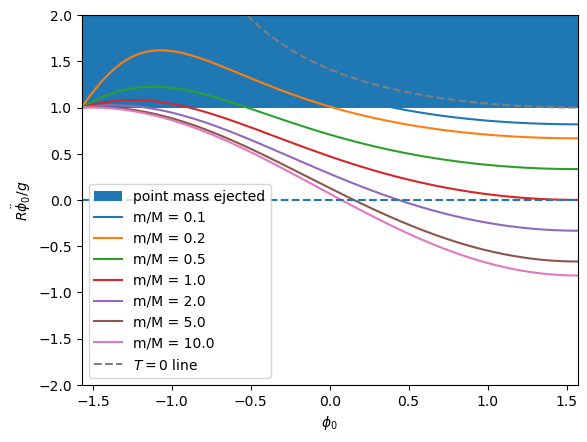

In [3]:
phi = np.arange(-np.pi/2, np.pi/2 + 0.01, 0.01)
mpM = np.array([0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0])

plt.fill_between(phi, phi/phi, 2*phi/phi, label = f'point mass ejected')
for mM in mpM:
    num = (np.cos(np.pi/4 - phi/2) - mM * np.sin(phi))
    den = (np.cos(np.pi/4 - phi/2)**2 + mM)
    acc = num / den
    plt.plot(phi, acc, label = f'm/M = {mM}')
plt.plot(phi, 1 / np.cos(np.pi/4 - phi/2), 
         label = r'$T = 0$ line', linestyle = 'dashed')
plt.legend()
plt.axhline(0, linestyle = 'dashed')
plt.xlabel(r'$\phi_0$')
plt.ylabel(r'$R\ddot{\phi}_0/g$')
plt.ylim(-2, 2)
plt.xlim(-np.pi/2, np.pi/2)
plt.show()

We can also see that the bigger $M$ is compared to $m$, the smaller the range of $\phi_0$ at which $m$ will not be spontaneously ejected.